In [41]:
import numpy as np

import pyart
import matplotlib.pyplot as plt

In [42]:
aws_nexrad_level2_file = (
    "s3://noaa-nexrad-level2/2013/06/01/KTLX/KTLX20130601_000034_V06.gz"
)

radar = pyart.io.read_nexrad_archive(aws_nexrad_level2_file)

In [43]:
radar.fields["reflectivity"]["data"][:, -10:] = np.ma.masked
gatefilter = pyart.filters.GateFilter(radar)
gatefilter.exclude_transition()
gatefilter.exclude_masked("reflectivity")

In [44]:
grid = pyart.map.grid_from_radars(
    (radar,),
    gatefilters=(gatefilter,),
    grid_shape=(20, 241, 241),
    grid_limits=((0, 25000), (-123000.0, 123000.0), (-123000.0, 123000.0)),
    fields=["reflectivity"],
)


In [45]:
np.shape(grid.fields['reflectivity']['data'])

(20, 241, 241)

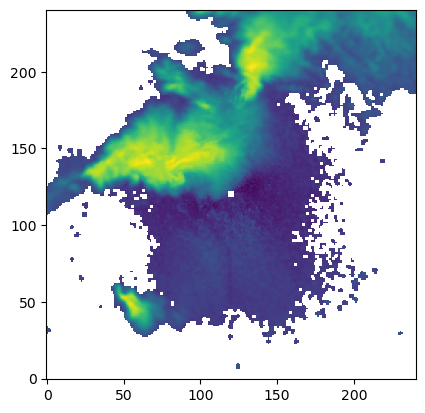

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(grid.fields["reflectivity"]["data"][0], origin="lower")
plt.show()